In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics  import f1_score, confusion_matrix, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/230219-DataHackathon/Notebooks

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/230219-DataHackathon/Notebooks


In [3]:
train_df = pd.read_csv("../Datasets/train.csv")

In [4]:
cyclica = train_df.sample(5000)
cyclica.info

<bound method DataFrame.info of         Unnamed: 0 annotation_sequence  feat_A  feat_C  feat_D  feat_E  \
476971         352                   I   False   False   False   False   
267334         472                   D   False   False    True   False   
351715         365                   I   False   False   False   False   
313559         699                   L   False   False   False   False   
168187           6                   K   False   False   False   False   
...            ...                 ...     ...     ...     ...     ...   
68676           56                   V   False   False   False   False   
468248         155                   A    True   False   False   False   
366317         120                   D   False   False    True   False   
201922         135                   T   False   False   False   False   
352845        1495                   T   False   False   False   False   

        feat_F  feat_G  feat_H  feat_I  ...  feat_DSSP_10  feat_DSSP_11  \
4769

In [5]:
cyclica.loc[:,'feat_DSSP_6':'feat_DSSP_13':2].head()

,feat_DSSP_6,feat_DSSP_8,feat_DSSP_10,feat_DSSP_12
476971,-4,4,2,-1
267334,-4,4,2,-2
351715,-87,-85,-2,-11
313559,-4,4,2,-2
168187,-2,2,1,0


# Converting Variables from One Format to Another

## Feat_DSSP_[number] transformation

In [6]:
sorted_DSSP_6 = cyclica.feat_DSSP_10.unique()
sorted_DSSP_6.sort()
sorted_DSSP_6

array([-2037, -1765,  -822,  -645,  -639,  -607,  -573,  -530,  -475,
        -457,  -440,  -422,  -381,  -376,  -342,  -299,  -289,  -276,
        -271,  -263,  -262,  -261,  -259,  -256,  -242,  -233,  -229,
        -227,  -215,  -214,  -209,  -201,  -193,  -186,  -185,  -184,
        -174,  -173,  -171,  -168,  -165,  -154,  -149,  -148,  -146,
        -144,  -139,  -134,  -133,  -129,  -128,  -126,  -123,  -122,
        -118,  -112,  -110,  -106,  -105,  -104,  -103,  -100,   -99,
         -98,   -96,   -89,   -88,   -86,   -85,   -84,   -79,   -78,
         -77,   -75,   -74,   -72,   -71,   -70,   -68,   -67,   -66,
         -65,   -64,   -63,   -61,   -60,   -58,   -55,   -54,   -53,
         -52,   -51,   -50,   -49,   -48,   -47,   -46,   -45,   -44,
         -43,   -41,   -40,   -39,   -38,   -37,   -35,   -34,   -33,
         -32,   -31,   -30,   -29,   -28,   -27,   -26,   -25,   -24,
         -23,   -22,   -21,   -20,   -19,   -18,   -17,   -16,   -15,
         -14,   -13,

In [7]:
sorted_DSSP_7 = cyclica.feat_DSSP_10.unique()
sorted_DSSP_7.sort()
sorted_DSSP_7

array([-2037, -1765,  -822,  -645,  -639,  -607,  -573,  -530,  -475,
        -457,  -440,  -422,  -381,  -376,  -342,  -299,  -289,  -276,
        -271,  -263,  -262,  -261,  -259,  -256,  -242,  -233,  -229,
        -227,  -215,  -214,  -209,  -201,  -193,  -186,  -185,  -184,
        -174,  -173,  -171,  -168,  -165,  -154,  -149,  -148,  -146,
        -144,  -139,  -134,  -133,  -129,  -128,  -126,  -123,  -122,
        -118,  -112,  -110,  -106,  -105,  -104,  -103,  -100,   -99,
         -98,   -96,   -89,   -88,   -86,   -85,   -84,   -79,   -78,
         -77,   -75,   -74,   -72,   -71,   -70,   -68,   -67,   -66,
         -65,   -64,   -63,   -61,   -60,   -58,   -55,   -54,   -53,
         -52,   -51,   -50,   -49,   -48,   -47,   -46,   -45,   -44,
         -43,   -41,   -40,   -39,   -38,   -37,   -35,   -34,   -33,
         -32,   -31,   -30,   -29,   -28,   -27,   -26,   -25,   -24,
         -23,   -22,   -21,   -20,   -19,   -18,   -17,   -16,   -15,
         -14,   -13,

In [8]:
sorted_DSSP_14 = cyclica.feat_DSSP_10.unique()
sorted_DSSP_14.sort()
sorted_DSSP_14

array([-2037, -1765,  -822,  -645,  -639,  -607,  -573,  -530,  -475,
        -457,  -440,  -422,  -381,  -376,  -342,  -299,  -289,  -276,
        -271,  -263,  -262,  -261,  -259,  -256,  -242,  -233,  -229,
        -227,  -215,  -214,  -209,  -201,  -193,  -186,  -185,  -184,
        -174,  -173,  -171,  -168,  -165,  -154,  -149,  -148,  -146,
        -144,  -139,  -134,  -133,  -129,  -128,  -126,  -123,  -122,
        -118,  -112,  -110,  -106,  -105,  -104,  -103,  -100,   -99,
         -98,   -96,   -89,   -88,   -86,   -85,   -84,   -79,   -78,
         -77,   -75,   -74,   -72,   -71,   -70,   -68,   -67,   -66,
         -65,   -64,   -63,   -61,   -60,   -58,   -55,   -54,   -53,
         -52,   -51,   -50,   -49,   -48,   -47,   -46,   -45,   -44,
         -43,   -41,   -40,   -39,   -38,   -37,   -35,   -34,   -33,
         -32,   -31,   -30,   -29,   -28,   -27,   -26,   -25,   -24,
         -23,   -22,   -21,   -20,   -19,   -18,   -17,   -16,   -15,
         -14,   -13,

It seems like `feat_DSSP_6` take the the same set of values, the range is from -1785 to 1280. We can stratify each into categorical values.

In [9]:
quantile_names = ['below 20%', 'below 40%', 'below 60%', 'below 80%', 'below 100%']
DSSP_6_quantiles = cyclica.feat_DSSP_6.quantile(q = [0.2, 0.6, 0.8], interpolation='nearest')
DSSP_6_quantiles

0.2   -4
0.6   -2
0.8    1
Name: feat_DSSP_6, dtype: int64

In [10]:
cyclica.feat_DSSP_8.quantile(q = [0.2, 0.6, 0.8], interpolation='nearest')

0.2   -1
0.6    3
0.8    4
Name: feat_DSSP_8, dtype: int64

In [11]:
cyclica.feat_DSSP_10.quantile(q = [0.2, 0.6, 0.8], interpolation='nearest')

0.2   -2
0.6    1
0.8    2
Name: feat_DSSP_10, dtype: int64

In [12]:
DSSP_6_quantiles.to_list()

[-4, -2, 1]

Different variables have different numbers for the same quantiles. So, stratification must be customized

In [13]:
def serial_5_stratify(arr):
  q = [0.2, 0.4, 0.6, 0.8]
  quantile_of_arr = arr.quantile(q= q, interpolation='nearest').to_list()
  labels = ['<=' + str(q[1]*100)+'%'] + ['<=' + str(k*100)+'%' for k in q] +['>' + str(q[-1]*100)+'%']

  def stratify(x, q, labels):
    if x <= q[0]:
      return labels[0]
    elif q[0] < x <= q[1]:
      return labels[1]
    elif q[1] < x <= q[2]:
      return labels[2]
    elif q[2] < x <= q[3]:
      return labels[3]
    else:
      return labels[4]

  return arr.map(lambda x: stratify(x, quantile_of_arr, labels))


In [14]:
from pyparsing.helpers import original_text_for
for col in cyclica.loc[:, 'feat_DSSP_6':'feat_DSSP_13']:
  original_name = cyclica[col].name
  new_name = original_name + '_cat'
  cyclica[new_name] = serial_5_stratify(cyclica[col])

In [15]:
cyclica.iloc[:, -6:].head()

,feat_DSSP_8_cat,feat_DSSP_9_cat,feat_DSSP_10_cat,feat_DSSP_11_cat,feat_DSSP_12_cat,feat_DSSP_13_cat
476971,<=60.0%,<=20.0%,<=60.0%,<=20.0%,<=20.0%,<=20.0%
267334,<=60.0%,<=20.0%,<=60.0%,<=20.0%,<=40.0%,<=20.0%
351715,<=40.0%,<=40.0%,<=40.0%,<=40.0%,<=40.0%,<=20.0%
313559,<=60.0%,<=40.0%,<=60.0%,<=20.0%,<=40.0%,<=20.0%
168187,<=20.0%,<=60.0%,<=40.0%,<=40.0%,<=40.0%,<=60.0%


`feat_DSSP_[number]` stratification complete

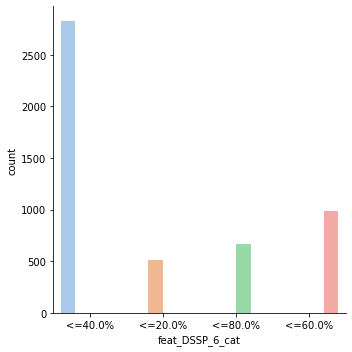

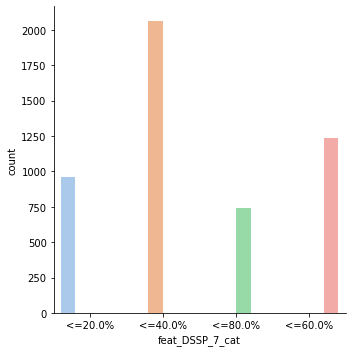

In [16]:
sns.catplot(data=cyclica, x= "feat_DSSP_6_cat", kind="count", 
            palette=sns.color_palette('pastel'), hue = "feat_DSSP_6_cat")

sns.catplot(data=cyclica, x= "feat_DSSP_7_cat", kind="count", 
            palette=sns.color_palette('pastel'), hue = "feat_DSSP_7_cat")

<AxesSubplot:xlabel='feat_DSSP_6_cat', ylabel='y_Ligand'>

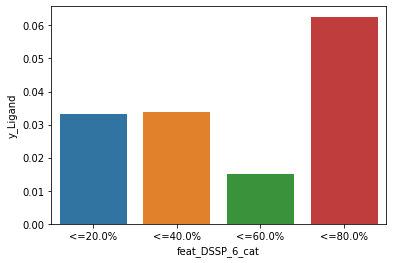

In [17]:
feat_6_vs_ligand = cyclica[['feat_DSSP_6_cat', 'y_Ligand']]
feat_6_vs_ligand = feat_6_vs_ligand.groupby(["feat_DSSP_6_cat"]).mean().sort_index()
sns.barplot(data = feat_6_vs_ligand, x = feat_6_vs_ligand.index, y = "y_Ligand")

<AxesSubplot:xlabel='feat_DSSP_7_cat', ylabel='y_Ligand'>

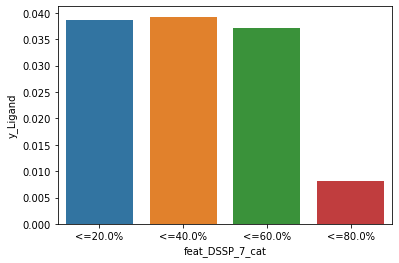

In [18]:
feat_7_vs_ligand = cyclica[['feat_DSSP_7_cat', 'y_Ligand']]
feat_7_vs_ligand = feat_7_vs_ligand.groupby(["feat_DSSP_7_cat"]).mean().sort_index()
sns.barplot(data = feat_7_vs_ligand, x = feat_7_vs_ligand.index, y = "y_Ligand")

<AxesSubplot:xlabel='feat_DSSP_8_cat', ylabel='y_Ligand'>

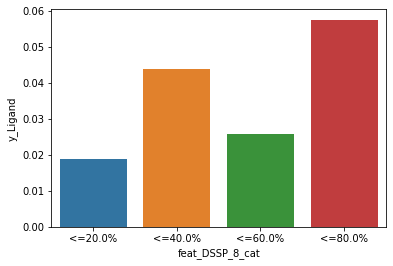

In [19]:
feat_8_vs_ligand = cyclica[['feat_DSSP_8_cat', 'y_Ligand']]
feat_8_vs_ligand = feat_8_vs_ligand.groupby(["feat_DSSP_8_cat"]).mean().sort_index()
sns.barplot(data = feat_8_vs_ligand, x = feat_8_vs_ligand.index, y = "y_Ligand")

There are systematic difference between different strata, but the replationship is not necessarily ordinal. So I need to convert them into unordered categorical form.

# Below Performs Unit Convertion to SASA

In [20]:
# Reverse sign of negative values
cyclica['feat_BBSASA'] = cyclica['feat_BBSASA'].where(cyclica.feat_BBSASA > 0, 0, axis = "index")
cyclica['feat_SCSASA'] = cyclica['feat_SCSASA'].where(cyclica.feat_BBSASA > 0, 0, axis = "index")

<AxesSubplot:xlabel='feat_BBSASA', ylabel='Count'>

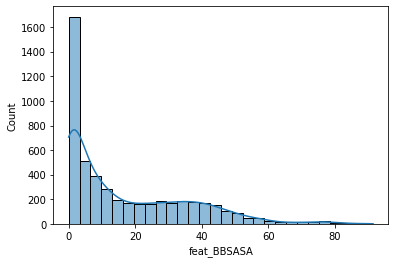

In [21]:
sns.histplot(cyclica, x = 'feat_BBSASA', kde=True, palette=sns.color_palette('muted'))

<AxesSubplot:xlabel='feat_SCSASA', ylabel='Count'>

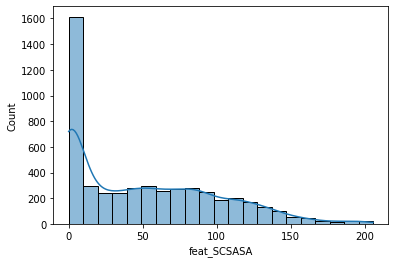

In [22]:
sns.histplot(cyclica, x = 'feat_SCSASA', kde=True, palette=sns.color_palette('muted'))

<AxesSubplot:xlabel='feat_PHI', ylabel='Count'>

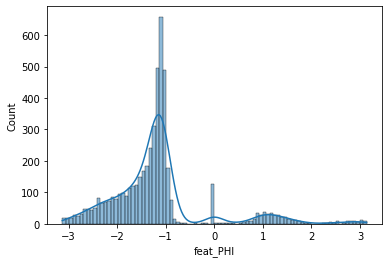

In [23]:
cyclica.feat_PHI.unique()
sns.histplot(cyclica, x = 'feat_PHI', kde = True)

<AxesSubplot:xlabel='feat_PSI', ylabel='Count'>

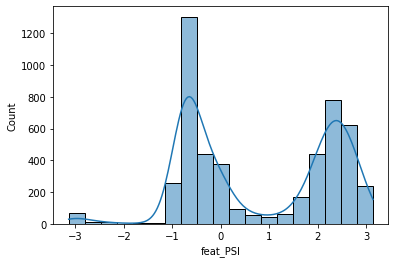

In [24]:
cyclica.feat_PSI.unique()
sns.histplot(cyclica, x = 'feat_PSI', kde = True)

<AxesSubplot:xlabel='feat_TAU', ylabel='Count'>

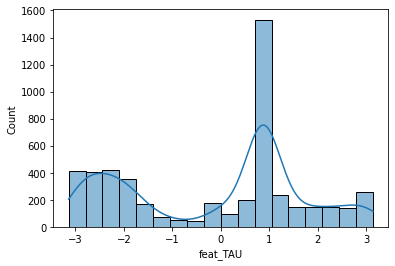

In [25]:
cyclica.feat_TAU.unique()
sns.histplot(cyclica, x = 'feat_TAU', kde = True)

Can do clustering on bonding angle based on modes' and troughs locations.

According to referential resources, "All the amino acids have negative phi and psi angles, typical values being -60 degrees and -50 degrees, respectively." [Peptide Torsion Angles and Secondary Structure](https://www.cryst.bbk.ac.uk/PPS95/course/9_quaternary/3_geometry/torsion.html#:~:text=All%20the%20amino%20acids%20have,and%20%2D50%20degrees%2C%20respectively.). 

According to another resource [Phi and Psi Angles](https://proteopedia.org/wiki/index.php/Phi_and_Psi_Angles), phi angle is between planes formed by (alpha carbon, carboxyl group, and nitrogen) of two different amino residues. These are torsion angles, not just enclosed angles between two atoms. 

One thing is certain, some bonding angles are more frequent than the others for a given amino acid. Such a frequency pattern may changes with amino acid type.


# Group by Protein Entry and Sort

In [26]:
cyclica.entry.unique().size

703

There are 701 different proteins in the sample

In [27]:
# cyclica.groupby(['entry']).sort_values(by = ['entry_index'])
np.array(train_df.entry_index[1000:1600])

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [28]:
train_df.entry.iloc[-1]

'AOC3_HUMAN'

Yes, amino acids of the same proteins are grouped together, and sorted in the order that they show up on the protein. The next questions is how these proteins are named? Do certain naming rules reflect protein binding capabilities?

So [here](https://www.uniprot.org/help/entry_name) is the pattern of naming protein: X_Y.

X is the abbreviation of the protein/gene name of the protein, comprised of up to 5 alphanumeric digits.
Y is the source of the protein. It can human, chicken,  E Coli, etc. In this project, we can study human proteins.

The naming system for the dataset is "UniProtKB/Swiss-Prot entry name," not "UniProtKB/TrEMBL entry names".

In [29]:
# train_df.entry.iloc[0:10000].str.extract(r'(\w+)(\d)(\w)')
entry_group = train_df['entry'].unique()
entry_group = pd.Series(entry_group)
entry_group

0      GEMI5_HUMAN
1      ACHB4_HUMAN
2       RFC2_HUMAN
3       THIO_HUMAN
4       ADH7_HUMAN
          ...     
718     PPP5_HUMAN
719     PECR_HUMAN
720     MCM2_HUMAN
721    IP3KC_HUMAN
722     AOC3_HUMAN
Length: 723, dtype: object

There are 722 different proteins in the entire training sets.

In [30]:
# Split the string into prefix, number (0 or more), postfix characters (0 or more)
entry_unique_split =  entry_group.str.extract(r'^([A-Z]+)(\d*)([A-Z]*)')
entry_unique_split.columns = ['Prefix', 'Digit', 'Postfix']
entry_unique_split.head(10)

,Prefix,Digit,Postfix
0,GEMI,5,
1,ACHB,4,
2,RFC,2,
3,THIO,,
4,ADH,7,
5,DPYL,5,
6,SRPRA,,
7,ATTY,,
8,TN,13,B
9,ATLA,1,


In [31]:
prefix_unique = entry_unique_split.Prefix.unique()
prefix_unique, prefix_unique.size

(array(['GEMI', 'ACHB', 'RFC', 'THIO', 'ADH', 'DPYL', 'SRPRA', 'ATTY',
        'TN', 'ATLA', 'GALE', 'BUB', 'PRS', 'SMYD', 'ARP', 'IL', 'MDHM',
        'CACO', 'SRP', 'GRM', 'RIOK', 'AOFA', 'ORC', 'NLRP', 'ALAT',
        'ACADV', 'NUMA', 'GBP', 'TKT', 'KDM', 'TNPO', 'DPOLB', 'CBPA',
        'PYC', 'MCLN', 'UCHL', 'SCAR', 'PE', 'S', 'AT', 'TAF', 'DHTK',
        'PHF', 'HMDH', 'AMPE', 'IVD', 'MRP', 'R', 'METH', 'CPSM', 'ACACB',
        'MACD', 'FFAR', 'ZN', 'M', 'SELB', 'LRRT', 'CMC', 'IF', 'CD',
        'KCAB', 'SRR', 'GCST', 'DHSO', 'REV', 'FCL', 'GALK', 'NCOA',
        'HARS', 'NF', 'CRYL', 'HASP', 'CH', 'UBA', 'DCHS', 'APOE', 'MEPCE',
        'HCDH', 'STAP', 'XPO', 'IDH', 'PSB', 'PTGR', 'STPAP', 'TCPE',
        'MSH', 'ANM', 'ABCF', 'HIF', 'SUCB', 'ATX', 'ABCG', 'IRAK', 'CPSF',
        'ABCD', 'NMDZ', 'DDC', 'MTRR', 'PDIA', 'CP', 'PUR', 'ACD', 'ARL',
        'RAB', 'ULK', 'TIF', 'TTBK', 'MKNK', 'ROS', 'PEPC', 'GP', 'SMCA',
        'KGP', 'TEAD', 'MRCKB', 'GRK', 'RIT', 'PPIB', 'TRAP',

In [32]:
digit_unique = entry_unique_split.Digit.unique()
digit_unique, digit_unique.size

(array(['5', '4', '2', '', '7', '13', '1', '6', '3', '54', '14', '8',
        '144', '224', '33', '60', '22', '46', '11', '31', '18', '30', '53',
        '37', '21', '38', nan, '9', '43', '72', '17', '73', '19', '10',
        '12', '39', '75', '32', '90', '42', '15', '85', '16', '09', '71',
        '34', '261', '03', '47', '52', '76', '262', '92', '20', '57'],
       dtype=object), 55)

In [33]:
post_unique = entry_unique_split.Postfix.unique()
post_unique, post_unique.size

(array(['', 'B', 'A', 'R', 'L', 'GD', 'N', 'BA', 'K', nan, 'AK', 'G', 'C',
        'AV', 'BP', 'D', 'X', 'P', 'CG', 'E', 'AD', 'H', 'TC', 'CA', 'GT',
        'KA', 'KC'], dtype=object), 27)

Observations: 
* Some proteins has the same prefix in their names but different digit and postfixes attached
* The number of distinct values of distinct unique digits and postfix are far less than the prefixes, which means that they are more controllable

Decision:
* Group 'y_Ligand' by prefixes, digits, and postfixes respectively, see if there are systematic frequency differences between categories?

In [34]:
entry_Ligand = train_df[['entry', 'y_Ligand']]
entry_split = entry_Ligand.entry.str.extract(r'^([A-Z]+)(\d*)([A-Z]*)')
entry_split.columns = ['prefix', 'digit', 'postfix']

In [35]:
entry_split.head()

,prefix,digit,postfix
0,GEMI,5,
1,GEMI,5,
2,GEMI,5,
3,GEMI,5,
4,GEMI,5,


In [36]:
entry_Ligand = pd.concat([entry_split, entry_Ligand.y_Ligand], axis = 1)
entry_Ligand.head()

,prefix,digit,postfix,y_Ligand
0,GEMI,5,,False
1,GEMI,5,,False
2,GEMI,5,,False
3,GEMI,5,,False
4,GEMI,5,,False


In [37]:
ligand_by_prefix = entry_Ligand.groupby(['prefix']).y_Ligand.sum()
ligand_by_prefix['PPP']

15

One protein can have multiple drug binding sites. Some have more, some have a little.

<AxesSubplot:xlabel='postfix', ylabel='y_Ligand'>

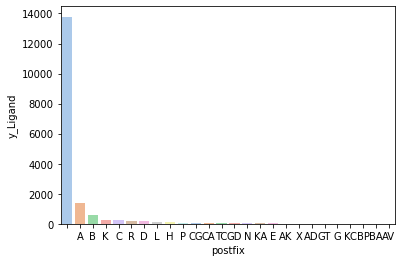

In [38]:
ligand_by_postfix = entry_Ligand.groupby(['postfix']).y_Ligand.sum().sort_values(ascending = False)
sns.barplot(x = ligand_by_postfix.index, y = ligand_by_postfix, palette = sns.color_palette('pastel'))

Proteins with no post fixes tend to have more drug binding sites.

<AxesSubplot:xlabel='digit', ylabel='y_Ligand'>

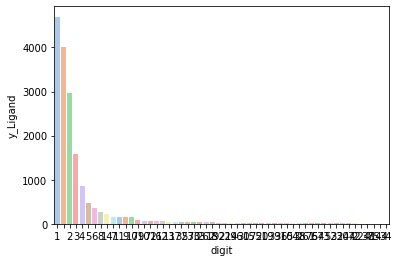

In [39]:
ligand_by_digit = entry_Ligand.groupby(['digit']).y_Ligand.sum().sort_values(ascending = False)
sns.barplot(x = ligand_by_digit.index, y = ligand_by_digit, palette = sns.color_palette('pastel'))

There are several digits that protein bindingsites concentrate. So we extract these indexes and treat them as majority.

In [40]:
ligand_by_digit.sort_values(ascending = False).head(5).index

Index(['1', '', '2', '3', '4'], dtype='object', name='digit')

We can replace nan or '' digit by 0. Do this in the final prepocessing procedure.



<AxesSubplot:xlabel='prefix', ylabel='y_Ligand'>

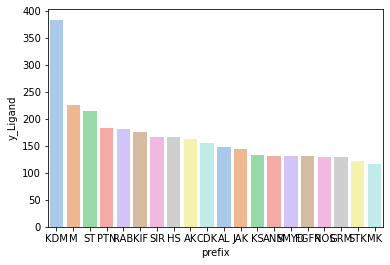

In [41]:
ligand_by_prefix = entry_Ligand.groupby(['prefix']).y_Ligand.sum().sort_values(ascending = False).head(20)
sns.barplot(x = ligand_by_prefix.index, y = ligand_by_prefix, palette = sns.color_palette('pastel'))

Prefixes that contain 'K', 'A', 'S', 'M' are quite common in drug binding sites.

We might be interested in what proportion that each postfix and digits show up in drug-binding residues. We can group data first by prefix and then by digit or postfix.

In [42]:
entry_Ligand_indexed = entry_Ligand.set_index(['prefix', 'digit']),
# sns.countplot(data = entry_Ligand, x = 'prefix', y = 'y_Ligand', multiple = 'stack', hue = 'digit')

## Visualize and cut pLDDT Levels

In [43]:
np.array(train_df.feat_pLDDT[1:100])

array([46.08, 65.42, 85.17, 93.24, 95.33, 97.03, 97.78, 98.05, 98.24,
       98.22, 98.29, 97.93, 97.3 , 96.1 , 95.91, 96.33, 97.17, 96.84,
       98.23, 98.19, 97.73, 96.39, 90.84, 77.81, 89.04, 96.3 , 98.03,
       97.96, 98.41, 98.35, 97.72, 95.71, 96.37, 96.84, 98.11, 98.1 ,
       97.79, 97.77, 96.72, 96.24, 93.52, 91.06, 88.86, 91.09, 87.73,
       89.07, 86.79, 85.15, 84.08, 89.95, 91.71, 92.96, 94.9 , 94.74,
       95.99, 94.33, 92.64, 95.48, 97.12, 94.74, 91.65, 96.65, 93.19,
       95.8 , 96.49, 97.93, 97.  , 97.45, 98.34, 98.44, 97.98, 96.89,
       95.62, 95.73, 93.2 , 90.94, 93.97, 94.99, 94.92, 97.16, 97.64,
       98.23, 98.44, 98.  , 97.95, 96.14, 95.34, 94.23, 97.49, 98.05,
       98.01, 97.84, 98.16, 96.93, 95.86, 93.5 , 94.21, 95.36, 95.84])

<AxesSubplot:xlabel='feat_pLDDT', ylabel='Count'>

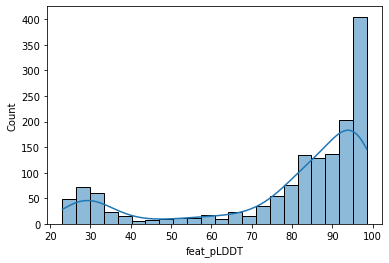

In [44]:
sns.histplot(data=train_df.iloc[0:1504], x = 'feat_pLDDT', kde = True)

<AxesSubplot:xlabel='feat_pLDDT', ylabel='Count'>

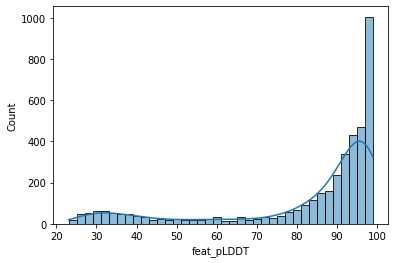

In [45]:
sns.histplot(data=train_df.iloc[0:4000], x = 'feat_pLDDT', kde = True)

<AxesSubplot:xlabel='feat_pLDDT', ylabel='Count'>

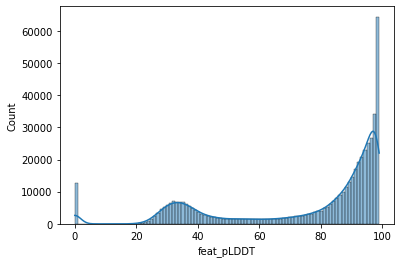

In [46]:
sns.histplot(data=train_df, x = 'feat_pLDDT', kde = True)

Can cut the `pLDDT` into 4 pieces: [0, 20), [20, 40), [40, 80), [80, 100)

In [47]:
pd.cut(train_df.feat_pLDDT.iloc[0:1000], bins = [0, 20, 40, 80, 100], right = False)

0       [20, 40)
1       [40, 80)
2       [40, 80)
3      [80, 100)
4      [80, 100)
         ...    
995    [80, 100)
996    [80, 100)
997    [80, 100)
998    [80, 100)
999    [80, 100)
Name: feat_pLDDT, Length: 1000, dtype: category
Categories (4, interval[int64, left]): [[0, 20) < [20, 40) < [40, 80) < [80, 100)]